In [1]:
from typing import Dict, List, Tuple
import torch
import numpy as np
import gym
import json
from plotly.subplots import make_subplots
from DQN_Agent import *
from Logger import *


%load_ext autoreload
%autoreload 2

## Set environment and agent parameters

In [2]:
env_arguments = {
"alpha":1,
"beta":1,
"min_temp" : 16,
"max_temp" : 21,
"action_dim": 100,
"modelname":'CELLS_v1.fmu',
"simulation_path":  r'C:\Users\Harold\Desktop\ENAC-Semester-Project\DIET_Controller\custom_gym\Eplus_simulation',
"param_list": ['Tair', 'RH', 'Tmrt', 'Tout', 'Qheat', 'Occ'],
"days": 151,  
"hours": 24,  
"minutes": 60,
"seconds": 60,
"ep_timestep": 6
}

agent_arguments = {
"memory_size": [1000],
"batch_size": [32],
"target_update": [100],
"epsilon_decay": [1 / 20000],
"max_epsilon": [1],
"min_epsilon":  [0.0],
"gamma": [0.99],
"inside_dim": [128],
"num_hidden_layers": [6],
"seed": [778]
}

Agent Action_dim100
Env action_dim 100
 BETA 10000
Iteration0
Iteration100
Iteration200
Iteration300
Iteration400
Iteration500
Iteration600
Iteration700
Iteration800
Iteration900
Iteration1000
Iteration1100
Iteration1200
Iteration1300
Iteration1400
Iteration1500
Iteration1600
Iteration1700
Iteration1800
Iteration1900
Iteration2000
Iteration2100
Iteration2200
Iteration2300
Iteration2400
Iteration2500
Iteration2600
Iteration2700
Iteration2800
Iteration2900
Iteration3000
Iteration3100
Iteration3200
Iteration3300
Iteration3400
Iteration3500
Iteration3600
Iteration3700
Iteration3800
Iteration3900
Iteration4000
Iteration4100
Iteration4200
Iteration4300
Iteration4400
Iteration4500
Iteration4600
Iteration4700
Iteration4800
Iteration4900
Iteration5000
Iteration5100
Iteration5200
Iteration5300
Iteration5400
Iteration5500
Iteration5600
Iteration5700
Iteration5800
Iteration5900
Iteration6000
Iteration6100
Iteration6200
Iteration6300
Iteration6400
Iteration6500
Iteration6600
Iteration6700
Iteration

'C:\\Users\\Harold\\Desktop\\ENAC-Semester-Project\\DIET_Controller/results/2022_5_3/results_2022_5_3_0_7'

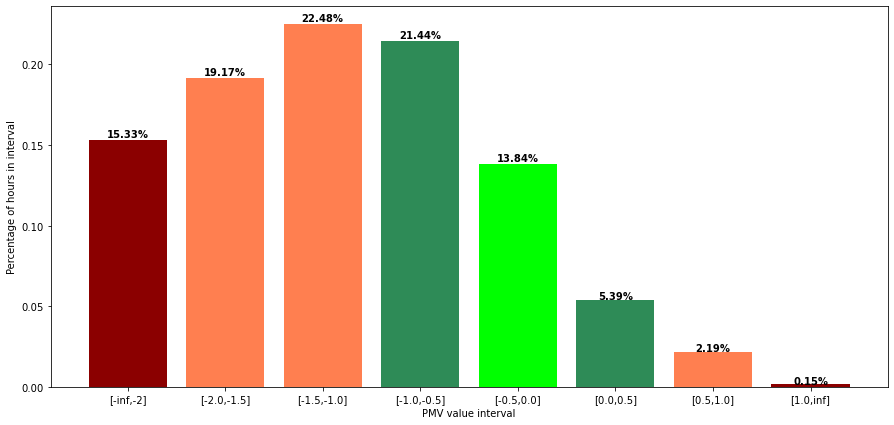

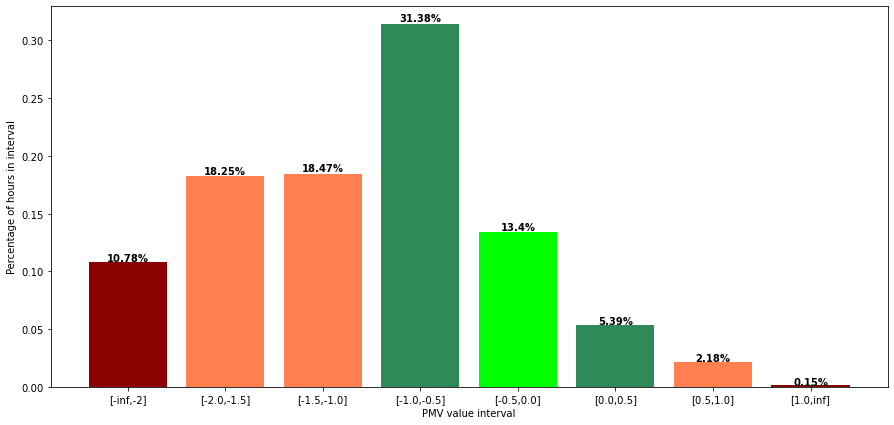

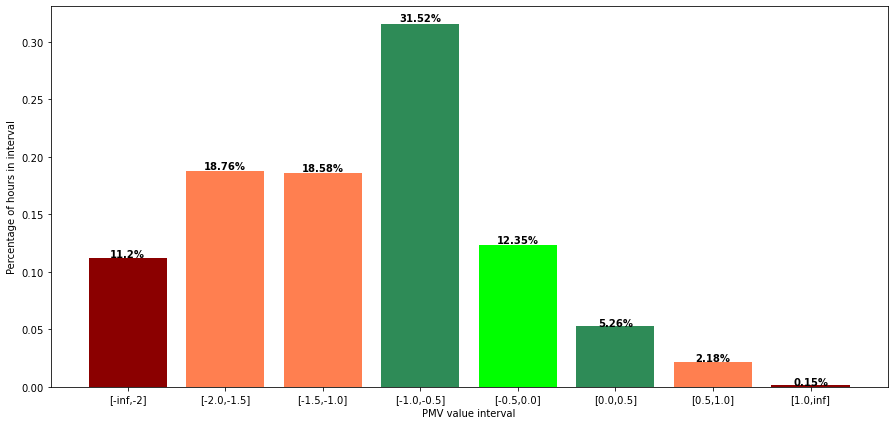

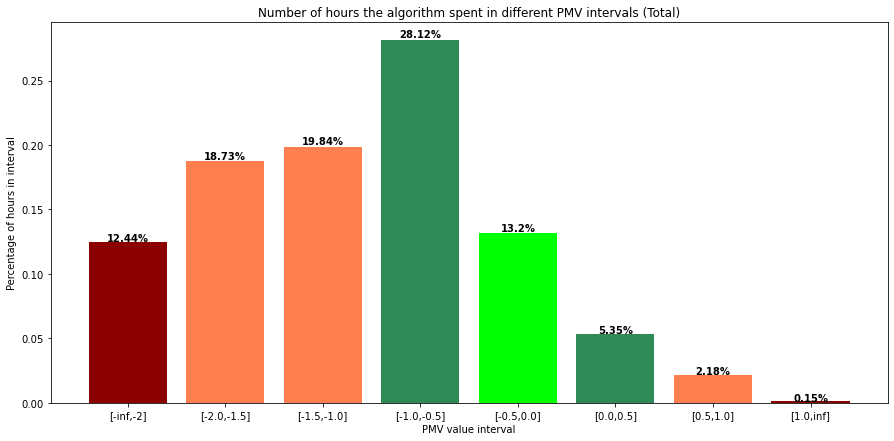

In [3]:
from utils import all_combinations_list

best_reward = -np.inf
best_path = ""

logging_path = r"C:\Users\Harold\Desktop\ENAC-Semester-Project\DIET_Controller"

for curr_agent_arguments in all_combinations_list(agent_arguments):

    env = gym.make('EnergyPlusEnv-v0')
    env.set_arguments(env_arguments)

    agent = DQNAgent(env,dict_arguments=curr_agent_arguments)
    total_cum_reward, total_cum_heat, results_path = agent.train(logging_path= logging_path, num_episodes=3, num_iterations=None ,log=True)

    if total_cum_reward > best_reward:
        best_reward = total_cum_reward
        best_path = results_path
  

best_path



In [4]:
from utils import assess_performance

assess_performance(r'C:/Users/Harold/Desktop/ENAC-Semester-Project/DIET_Controller/results/2022_4_30/results_2022_4_30_14_54/')

{WindowsPath('C:/Users/Harold/Desktop/ENAC-Semester-Project/DIET_Controller/results/2022_4_30/results_2022_4_30_14_54/experiments_csv/experiments_results_1.csv'): 0.5350667456999525,
 WindowsPath('C:/Users/Harold/Desktop/ENAC-Semester-Project/DIET_Controller/results/2022_4_30/results_2022_4_30_14_54/experiments_csv/experiments_results_2.csv'): 0.5619388214374257,
 WindowsPath('C:/Users/Harold/Desktop/ENAC-Semester-Project/DIET_Controller/results/2022_4_30/results_2022_4_30_14_54/experiments_csv/experiments_results_summary.csv'): 0.560152310902544}

In [8]:
# Example of how to use the function: 

from utils import search_paths

searching_directory = r"C:\Users\Harold\Desktop\ENAC-Semester-Project\DIET_Controller"

conditions={
    "num_iterations": ["=",21744], # to only have have trainings where the full simulation was used
    "num_episodes":["=",3],
    "alpha":["=",1],
    "beta":["=",1]
}

path_list, best_reward_path, best_heat_path = search_paths(searching_directory,conditions=conditions, top_k=10)

best_reward_path, best_heat_path

(array([WindowsPath('C:/Users/Harold/Desktop/ENAC-Semester-Project/DIET_Controller/results/2022_4_30/results_2022_4_30_16_20/env_params_2022_4_30_16_20.json'),
        WindowsPath('C:/Users/Harold/Desktop/ENAC-Semester-Project/DIET_Controller/results/2022_4_30/results_2022_4_30_15_39/env_params_2022_4_30_15_39.json'),
        WindowsPath('C:/Users/Harold/Desktop/ENAC-Semester-Project/DIET_Controller/results/2022_4_30/results_2022_4_30_15_31/env_params_2022_4_30_15_31.json'),
        WindowsPath('C:/Users/Harold/Desktop/ENAC-Semester-Project/DIET_Controller/results/2022_4_30/results_2022_4_30_16_10/env_params_2022_4_30_16_10.json'),
        WindowsPath('C:/Users/Harold/Desktop/ENAC-Semester-Project/DIET_Controller/results/2022_4_30/results_2022_4_30_15_50/env_params_2022_4_30_15_50.json'),
        WindowsPath('C:/Users/Harold/Desktop/ENAC-Semester-Project/DIET_Controller/results/2022_4_30/results_2022_4_30_22_49/env_params_2022_4_30_22_49.json'),
        WindowsPath('C:/Users/Harold/Des